Vna_files
Prosesamiento de datos



In [1]:
import numpy as np

def vna_proc_file(file_path, file_name):

    file_path += file_name

    header_start  = '#'
    data_start    = '!'
    out_dict = {'Data' : [],
                     'Index': [],
                     'Frec' : [],
                    }

    frecuencies = np.array([])
    reals       = np.array([])
    imgs        = np.array([])

    try:
        file = open(file_path, "r")
    except:
        print('TODO: No se puede abrir')
        return 404

    file_list = file.readlines()
    file.close()

    for line in file_list[12:]:
        values      = line.strip().split('\t')
        frecuencies = np.append(frecuencies, int(values[0]))
        reals       = np.append(reals, float(values[1]))
        imgs        = np.append(imgs, float(values[2]))

    out_dict['Data'   ] = file_list[0:11]
    out_dict['Index'  ] = file_list[11][1:].split(' ')
    out_dict['Frec'   ] = frecuencies
    out_dict['Img'    ] = imgs
    out_dict['Real'   ] = reals
    out_dict['Complex'] = reals +1j*imgs

    return out_dict


Convercin de parametros

In [2]:
def S11_to_Y11(frec, S11):
    z0 = 50
    y0 = 1/z0

    Y11 = y0*(( 1 - S11 ) / ( 1 + S11 ))

    return { 'Frec'    : frec,
             'Complex' : Y11,
            }

def Y11_from_E(Frec, E, C0, G0):
    W = 2*np.pi*Frec
    return (1j*W*E*C0 + G0*E**(5/2))

def Y11_AIRE(Frec, C0,G0):
    return Y11_from_E(Frec, 1, C0, G0)

def Get_Aire_C0_G0 (Frecs, Y11):
    out_dict:{'C0':[],
              'G0':[],
              }
    # Realizar el ajuste de curva
    C0_inicial = 1
    G0_inicial = 1
    parametros_optimizados, _ = curve_fit(Y11_AIRE, Frecs, Y11, p0=[C0_inicial, G0_inicial])

    # Los parámetros optimizados C0 y G0 estarán en 'parametros_optimizados'
    C0_optimizado, G0_optimizado = parametros_optimizados

    print("C0 optimizado:", C0_optimizado)
    print("G0 optimizado:", G0_optimizado)

    return C0_optimizado, G0_optimizado

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'Data': ['!Keysight Technologies N9917A: A.12.46\n', '!Date: Wednesday, 08 November 2023 22:05:14\n', '!TimeZone: (UTC-03:00) Buenos Aires!Model: N9917A\n', '!Serial: MY56072049\n', '!GPS Latitude: \n', '!GPS Longitude: \n', '!GPS TimeStamp: 0001-01-01 00:00:00Z\n', '!GPS Seconds Since Last Read: 0\n', '!CHECKSUM:1190943223\n', '!Correction: S11(ON U)\n', '!S1P File: Measurement: S11:\n'], 'Index': ['', 'Hz', 'S', 'RI', 'R', '50\n'], 'Frec': array([3.000000e+04, 1.829997e+06, 3.629994e+06, ..., 1.799640e+10,
       1.799820e+10, 1.800000e+10]), 'Img': array([0.00034068, 0.00199153, 0.00190167, ..., 0.25203548, 0.25371237,
       0.25294998]), 'Real': array([1.00403065, 1.00614649, 1.00472971, ..., 0.85472812, 0.85423692,
       0.85404302]), 'Complex': array([1.00403065+0.00034068j, 1.00614649+0.00199153j,
       1.00472971+0.00190167j, ..., 0.85472812+0.25203548j,
       0.85423692+0.25371237j, 0.85404302+0.25294998j])}


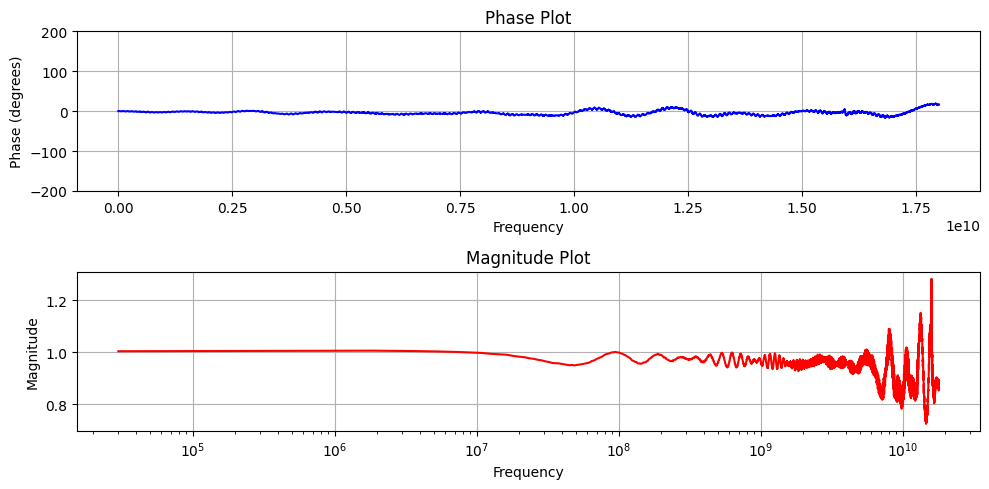

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# https://pysmith.readthedocs.io/en/latest/
if __name__ == '__main__':

    #file_path = '/content/drive/MyDrive/Proy_ME2_2023/08-Software/rsc'
    file_path = '/content/rsc/'

    file_name = ['ABS diluido s1p.s1p',#0
                 'Acetona s1p.s1p',#1
                 'Aire s1p.s1p',#2
                 'PLA s1p.s1p',#3
                 'agua s1p.s1p',#4
                 'alcohol s1p.s1p',#5
                 'dedo s1p.s1p',#6
              #
                 'AIRE_SP1.s1p', #7
    #              'Alcohol_SP1.s1p',
                 'Agua_destilada_SP1.s1p', #8
    #              'resina_SP1.s1p',
    #              'Acetona_SP1.s1p',
                ]
    dictionary = vna_proc_file(file_path, file_name[7])
    print(dictionary)

    Y11 = S11_to_Y11(dictionary['Frec'], dictionary['Complex'])

    phase  = np.angle( dictionary['Complex'], deg=True)
    module = np.abs(dictionary['Complex'] )

    plt.figure(figsize=(10, 5))

    # First subplot for the phase
    plt.subplot(2, 1, 1)
    # plt.xscale("log")
    plt.plot(dictionary['Frec'], phase,  color='b')
    plt.title('Phase Plot')
    plt.xlabel('Frequency')
    plt.ylabel('Phase (degrees)')
    plt.grid(True)
    plt.ylim(-200, 200)
    # Second subplot for the absolute value (magnitude)
    plt.subplot(2, 1, 2)
    plt.xscale("log")
    plt.plot(dictionary['Frec'], module, color='r')
    plt.title('Magnitude Plot')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.grid(True)
    # plt.ylim( -2, 2 )
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Show the figure with both subplots
    plt.show()
    pass

# Nueva sección

# Nueva sección

Para el agua Ec =1
=> Y11 = jCo + Go
=> R{Y11} = Go  y I{Y11] = WCo

In [ ]:
import cmath

#def calcolar_C_G( Y, f, E):
#  return [f, 2*np.pi*f*Y.imag, Y.real]  # frec , Co , Go
#Esta funcion calcula las curvas de Co y Go
#solo para el aire que E = 1

def calcolar_C_G( Y, f):
  return {'Frec': f,
          'Co'  : Y.imag/(2*np.pi*f),
          'Go'  : Y.real,
          }

# CoGo = calcolar_C_G(Y11['Complex'], Y11['Frec'])
# print(CoGo)




In [ ]:
import cmath
import numpy as np

def ecuacion_trascendental(E, W, C, G, Y):
  # return (1j * W * E * C + G*(E**2.5)) - Y # dan igual
 return 1j * W * E * C + cmath.exp(2.5 * cmath.log(E**2)) * G - Y


def derivada_ecuacion_trascendental(E, W, C, G):
  # return (1j*W*C + (5/2)*G*(E**2.5)/E) # dan igual
  return 1j * W * C + 5 * cmath.exp(2.5 * cmath.log(E**2)) * G / (2 * E)

def Calculo_Ec(Y, f, C, G, E_inicial=(1 + 1j), tolerancia=(5e-2), max_iteraciones=10000):
    W = 2*np.pi*f
    E = E_inicial

    for _ in range(max_iteraciones):
        f = ecuacion_trascendental(E, W, C, G, Y)
        f_prime = derivada_ecuacion_trascendental(E, W, C, G)
        E -= f / f_prime
        if (abs(f) < tolerancia):
          print('f:',f,'E:',E)
          return E

    print('dif: ',abs(f), 'E: ',E)
    raise RuntimeError("No se pudo converger a una solución en las iteraciones dadas.")


def Calculo_Ec_dic(Y11, CoGo):
  if np.array_equal(Y11['Frec'], CoGo['Frec']):

    Ec_dict = {'Frec': [], 'Eo': []}
    Y_d     = Y11['Complex']
    frec_d  = Y11['Frec']
    Co_d    = CoGo['Co']
    Go_d    = CoGo['Go']
    #print(frec_d)
    # Iterar
    for Y_, frec_, Co_, Go_  in zip(Y_d, frec_d, Co_d, Go_d):
      #print('Y_=',Y_)
      #print('Frec_=',frec_)
      #print('Co_=',Co_)
      #print('Go_=',Go_)
      Ec_dict['Frec'].append(frec_)

      if Ec_dict['Eo']:
        Ec_dict['Eo'].append(Calculo_Ec(Y_,frec_,Co_, Go_,Ec_dict['Eo'][-1]))
      else:
        Ec_dict['Eo'].append(Calculo_Ec(Y_,frec_,Co_, Go_))

      #print('Eo = ',Ec_dict['Eo'][-1],' , F = ',Ec_dict['Frec'][-1])
    return  Ec_dict

  else:
    print('TODO: No se puede abrir')
    return 404

# Ejemplo de uso:
#Y = 2.45+0.0025j
#f = 1
#C = 2
#G = 1
E_inicial = 1 + 1j

Y= (0.00031085341347285674+0.0001745635512860292j)
f= 23429961.0
C= 1470.5490493345042
G= 0.00013315469747494452

#como E_inicial podemos pasarle el valor anterior
solucion = Calculo_Ec(Y, f, C, G, E_inicial)
print("Solución encontrada para E:", solucion)

Y_ = 1j * 2*np.pi*f * solucion * C + cmath.exp(2.5 * cmath.log(solucion)) * G

print("coincide?:", Y_)

f: (-0.0008396198243460866-0.0007994693095907554j) E: (8.063481980098875e-16-1.4359016412787727e-15j)
Solución encontrada para E: (8.063481980098875e-16-1.4359016412787727e-15j)
coincide?: (0.00031085341347285674+0.00017456355128602917j)


# Nueva sección

Se truncaron las últimas líneas 5000 del resultado de transmisión.
f: (0.011436891303581283+0.010207263597988327j) E: (-0.2584545448860109-1.993453924781645j)
f: (-0.008016933239185571-0.007802215874324538j) E: (-0.29540245557120515-2.128801058508031j)
f: (0.009146483961054185+0.00852159206410373j) E: (-0.26448233413365646-2.010585505662792j)
f: (-0.008292786848614273-0.007986025560534717j) E: (-0.3026788532858612-2.1521337089925363j)
f: (0.01007027516485734+0.009682317469940305j) E: (-0.2709474645806046-2.018130954058263j)
f: (-0.008221282428482683-0.009890586996171624j) E: (-0.2947815019340264-2.186044983787256j)
f: (0.009390965567279003+0.012669438631900315j) E: (-0.28130544459583284-2.03242445676825j)
f: (-0.008341110804639298-0.009904316547554706j) E: (-0.3039091762133226-2.2052898516279313j)
f: (0.009509209955944689+0.012049932368278414j) E: (-0.2878225250091789-2.0531616673978035j)
f: (-0.00819552183209886-0.009546702673874884j) E: (-0.3105256005114161-2.2239770673202464j)
f: (0

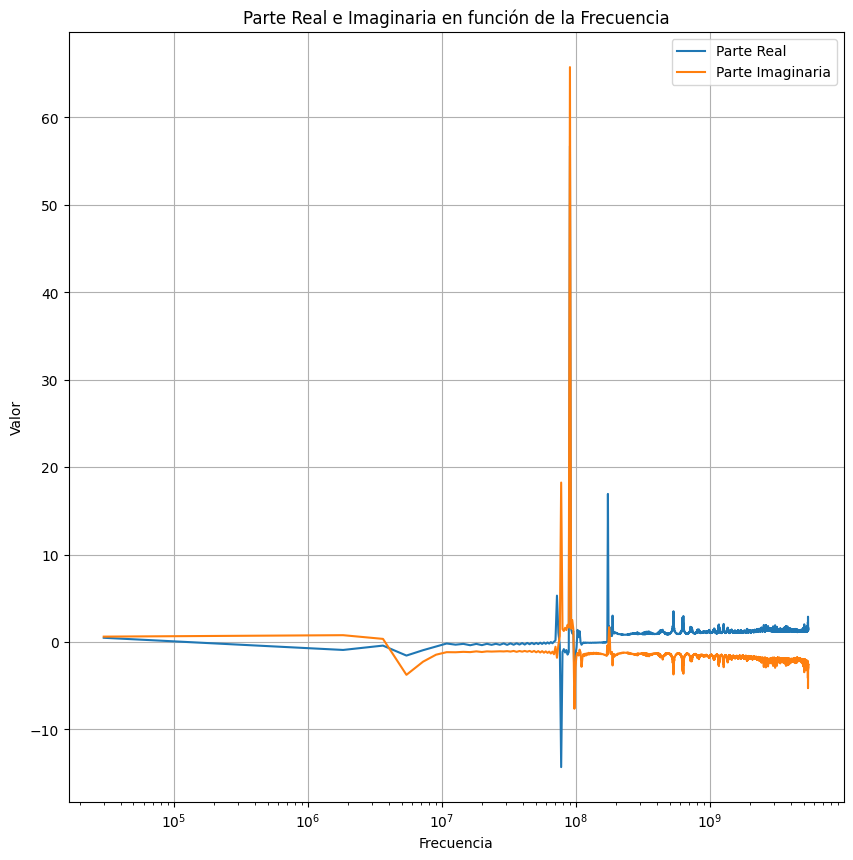

In [ ]:
import matplotlib.pyplot as plt

dictionary_aire = vna_proc_file(file_path, file_name[7])
Y11_aire = S11_to_Y11(dictionary_aire['Frec'], dictionary_aire['Complex'])
CoGo = calcolar_C_G(Y11_aire['Complex'], Y11_aire['Frec']) #C0 y G0 del aire
print(CoGo)

#Chequeamos con el agua
dictionary_agua = vna_proc_file(file_path, file_name[8])
Y11_agua        = S11_to_Y11(dictionary_agua['Frec'], dictionary_agua['Complex'])
Ec              = Calculo_Ec_dic(Y11_agua, CoGo)
print(np.real(Ec['Eo'][:3000]))
# Extraer frecuencias y números complejos
# frecuencias  = Ec['Frec'][:5000]
# Ec_complejos = Ec['Eo'][:5000]
frecuencias  = Ec['Frec'][:3000]
Ec_complejos = Ec['Eo'][:3000]
# Extraer partes reales e imaginarias
# partes_reales      = [z.real for z in Ec_complejos]
# partes_imaginarias = [z.imag for z in Ec_complejos]
partes_reales      = np.real(Ec_complejos)
partes_imaginarias = np.imag(Ec_complejos)

# Graficar
plt.figure(figsize=(10, 10))
plt.xscale("log")
plt.grid(True)
plt.plot(frecuencias, partes_reales, label='Parte Real')
plt.plot(frecuencias, partes_imaginarias, label='Parte Imaginaria')

# Etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Valor')
plt.title('Parte Real e Imaginaria en función de la Frecuencia')

# Leyenda
plt.legend()
# Mostrar el gráfico
plt.show()






Exportacion de archivo con todos los datos, de todas las mediciones (cargadas en los nombres de archivo de file_name)

In [ ]:
from datetime import datetime

for mat_file in file_name:
  out_dict = vna_proc_file(file_path, mat_file)
  out_Y11  = S11_to_Y11(out_dict['Frec'], out_dict['Complex'])
  out_Ec   = Calculo_Ec_dic(out_Y11, CoGo)

  output_array = np.column_stack((np.real(out_Y11['Frec']), out_dict['Complex'], out_Y11['Complex'], CoGo['Co'], CoGo['Go'], out_Ec['Eo']))
  timestamp = datetime.now().strftime("%d%H%M%S")
  out_file_name = file_path + 'out/'+ mat_file[:(len(mat_file)-8)] + f"_{timestamp}.txt"
  np.savetxt(out_file_name, output_array, delimiter='\t', header='Frequency S11 Y11 Co  Go  Eo', comments=''+datetime.now().strftime("%d %m %Y %H:%M:%S") +'\t\n')


graficar y guardar Y11 en imag y real

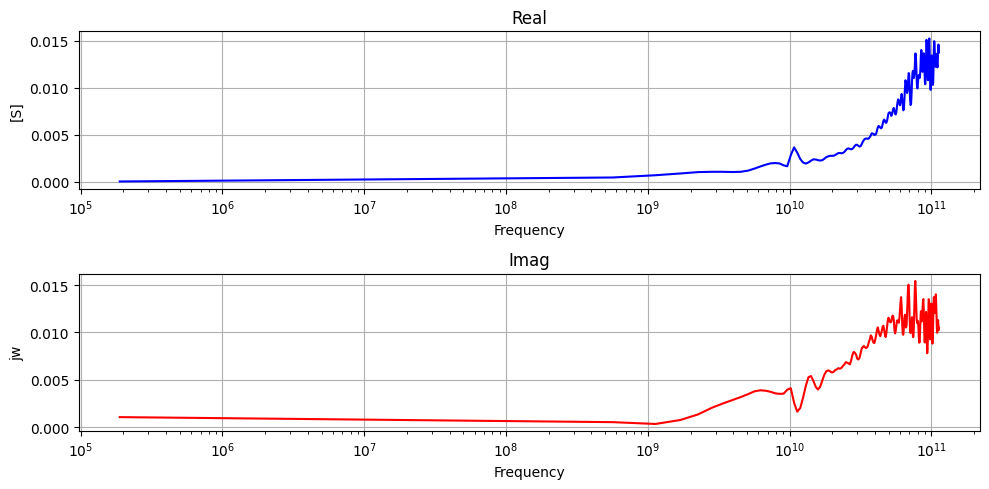

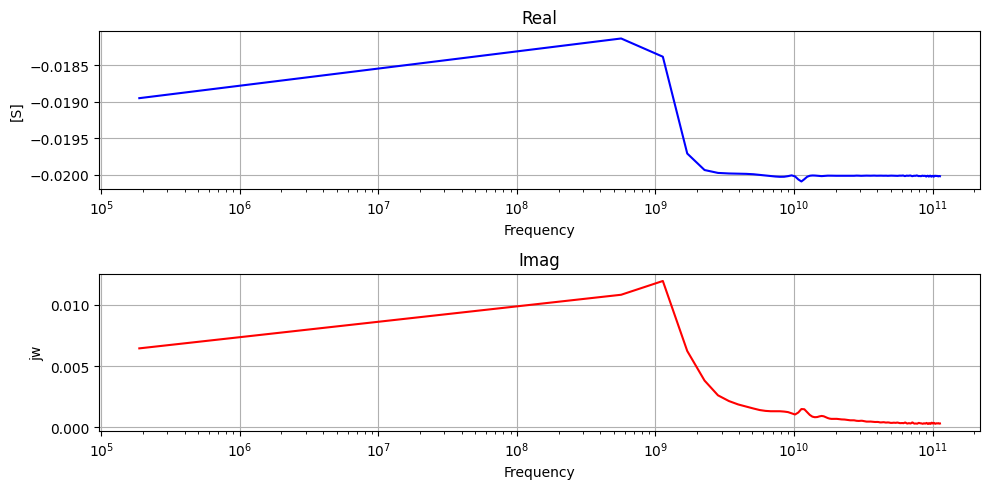

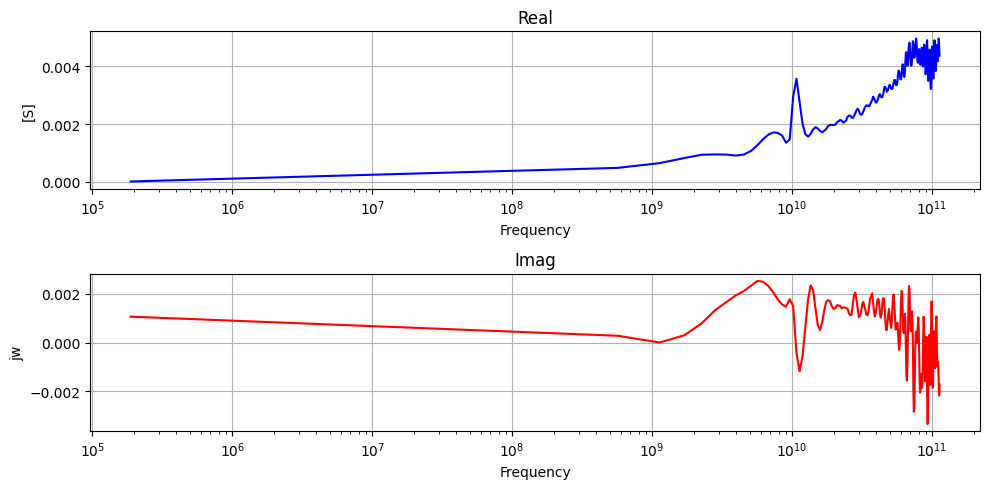

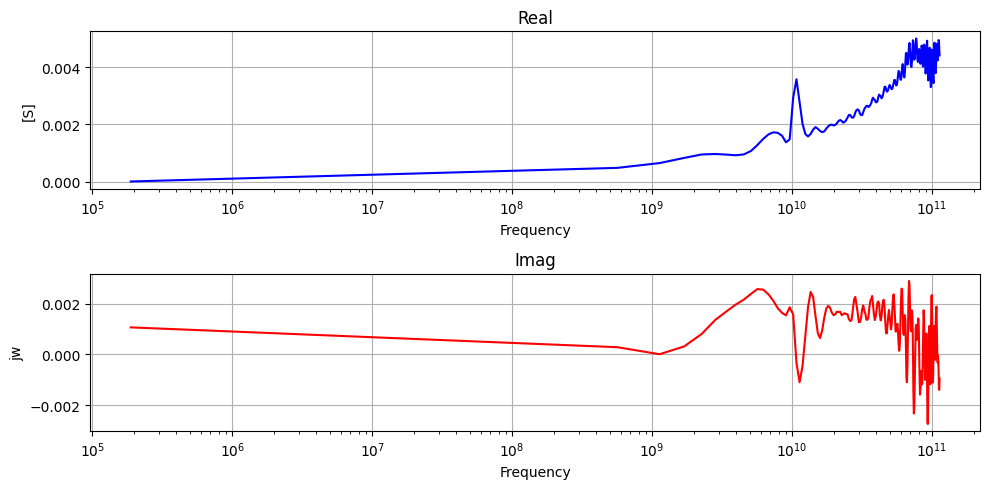

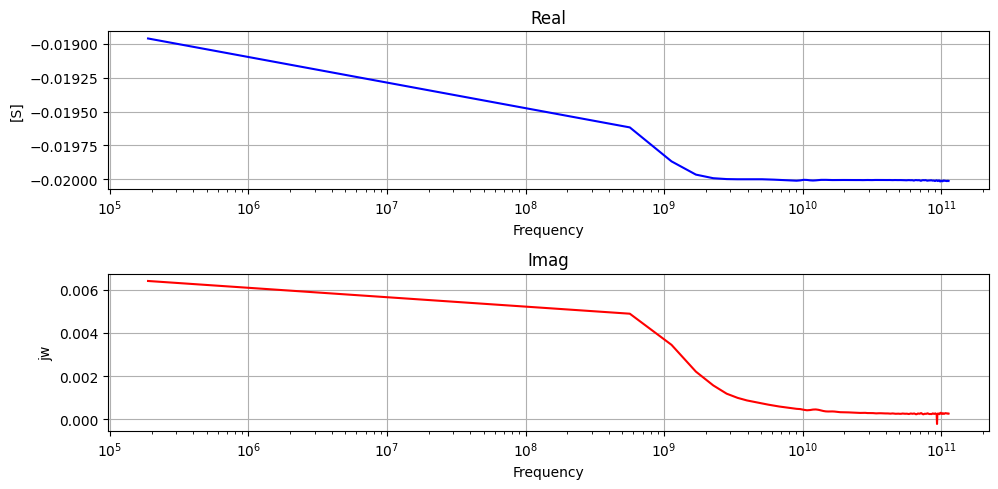

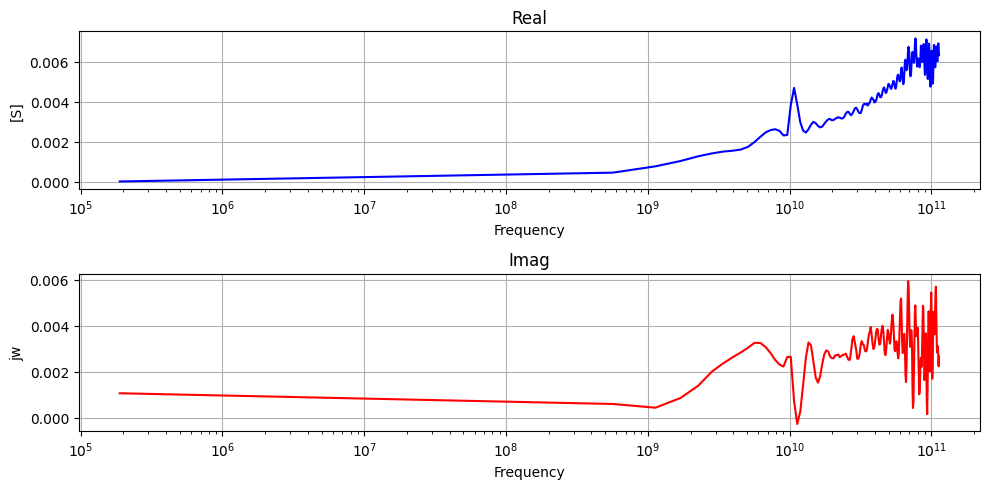

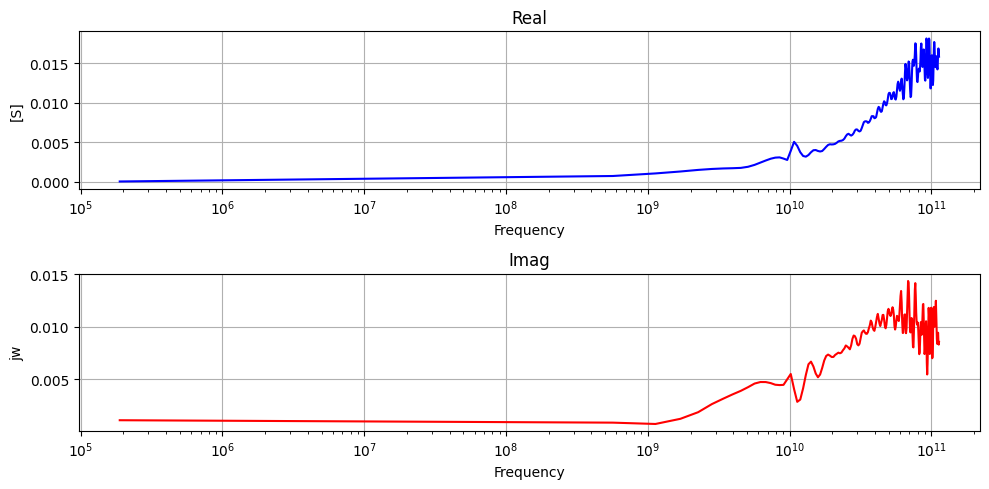

In [ ]:
from datetime import datetime

for mat_file in file_name:
  out_dict = vna_proc_file(file_path, mat_file)
  out_Y11  = S11_to_Y11(out_dict['Frec'], out_dict['Complex'])
  out_Ec   = Calculo_Ec_dic(out_Y11, CoGo)

  plt.figure(figsize=(10, 5))
  plt.subplot(2, 1, 1)
  plt.xscale("log")
  plt.plot(dictionary['Frec']*2*np.pi, np.real(out_Y11['Complex']),  color='b')
  plt.title('Real')
  plt.xlabel('Frequency')
  plt.ylabel('[S]')
  plt.grid(True)
  plt.subplot(2, 1, 2)
  plt.xscale("log")
  plt.plot(dictionary['Frec']*2*np.pi, np.imag(out_Y11['Complex']), color='r')
  plt.title('Imag')
  plt.xlabel('Frequency')
  plt.ylabel('jw')
  plt.grid(True)
  plt.tight_layout()
  timestamp = datetime.now().strftime("%d%H%M%S")
  out_file_name = file_path + 'out/'+ mat_file[:(len(mat_file)-8)] + f"_{timestamp}.png"
  # plt.savefig(out_file_name)

Graficar y grabar Ec y C0 G0 del aire

TODO: No se puede abrir


TypeError: ignored

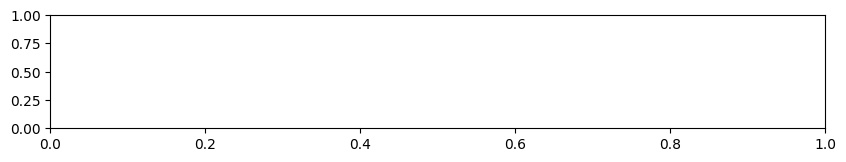

In [ ]:
for mat_file in file_name:
  out_dict = vna_proc_file(file_path, mat_file)
  out_Y11  = S11_to_Y11(out_dict['Frec'], out_dict['Complex'])
  out_Ec   = Calculo_Ec_dic(out_Y11, CoGo)

  plt.figure(figsize=(10, 5))
  plt.subplot(3, 1, 1)

  plt.plot(dictionary['Frec'], out_Ec['Eo'],  color='b')
  plt.title('Ec')
  plt.xlabel('Frequency')
  plt.grid(True)
  plt.subplot(3, 1, 2)
  plt.xscale("log")
  plt.plot(dictionary['Frec']*2*np.pi, CoGo['Co'], color='g')
  plt.title('C0')
  plt.xlabel('Frequency')
  plt.ylabel('jw')
  plt.grid(True)
  plt.subplot(3, 1, 3)
  plt.xscale("log")
  plt.plot(dictionary['Frec']*2*np.pi, CoGo['Go'], color='r')
  plt.title('G0')
  plt.xlabel('Frequency')
  plt.ylabel('jw')
  plt.grid(True)
  plt.tight_layout()
  timestamp = datetime.now().strftime("%d%H%M%S")
  out_file_name = file_path + 'out/'+ 'Ec_' + mat_file[:(len(mat_file)-8)] + f"_{timestamp}.png"
  # plt.savefig(out_file_name)

{'Frec': array([3.000000e+04, 1.829997e+06, 3.629994e+06, ..., 1.799640e+10,
       1.799820e+10, 1.800000e+10]), 'Co': array([-6.39580530e-01, -2.27589482e+02, -4.31686105e+02, ...,
       -3.25372104e+08, -3.27660760e+08, -3.26811958e+08]), 'Go': array([-4.02260114e-05, -6.12961928e-05, -4.72035023e-05, ...,
        1.17548571e-03,  1.17576318e-03,  1.18023273e-03])}


<ipython-input-11-cc48ddf5376f>:12: RuntimeWarning: invalid value encountered in power
  return ((np.real(1j * W * Ec * C0 + Ec**(5/2) * G0) - Y11.real) + np.imag(1j * W * Ec * C0 + Ec**(5/2) * G0) - Y11.imag)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


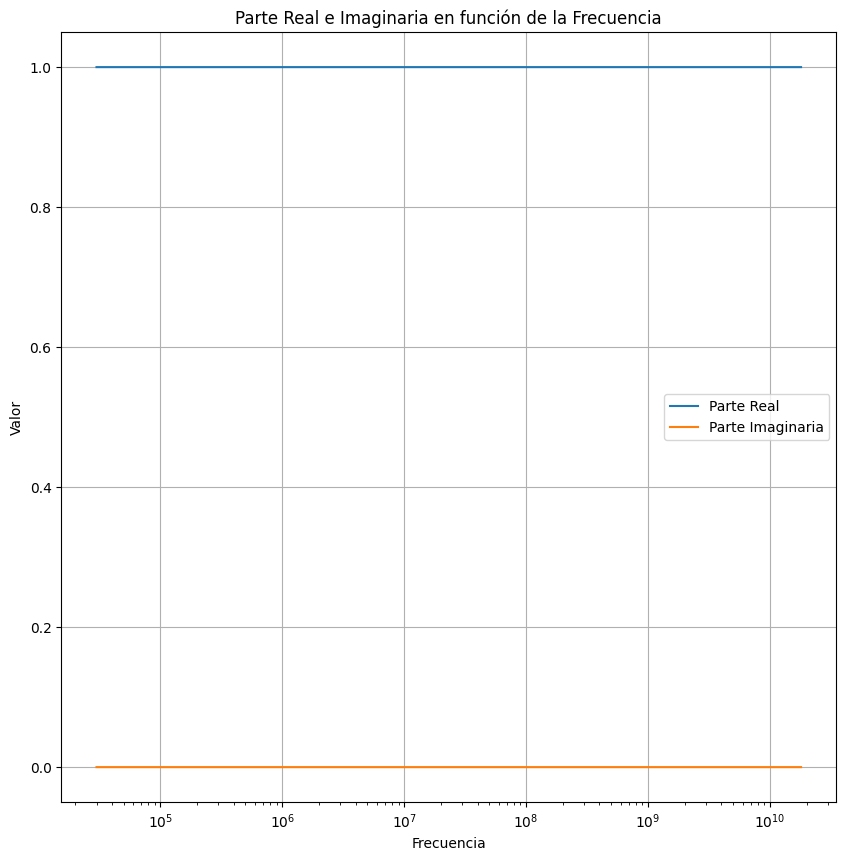

In [ ]:
from scipy.optimize import fsolve

dictionary_aire = vna_proc_file(file_path, file_name[0])
Y11_aire = S11_to_Y11(dictionary_aire['Frec'], dictionary_aire['Complex'])

CoGo = calcolar_C_G(Y11_aire['Complex'], Y11_aire['Frec']) #C0 y G0 del aire
print(CoGo)

# Define the equation
def equation(Ec, Frecs, Y11, C0, G0):
  W  = 2*np.pi*Frecs
  return ((np.real(1j * W * Ec * C0 + Ec**(5/2) * G0) - Y11.real) + np.imag(1j * W * Ec * C0 + Ec**(5/2) * G0) - Y11.imag)

# def equation(Ec, Frecs, Y11, C0, G0):
#   W = 2 * np.pi * Frecs
#   Ec_non_negative = np.maximum(Ec, 0)
#   real_part = np.real(1j * W * Ec_non_negative * C0 + Ec_non_negative**(5/2) * G0)
#   imag_part = np.imag(1j * W * Ec_non_negative * C0 + Ec_non_negative**(5/2) * G0)
#   return ((real_part - Y11.real) + (imag_part - Y11.imag))

# Initial guess for Ec
initial_guess = np.ones_like(Y11_aire['Complex'].real/Y11_aire['Complex'].real)
# Solve the equation using fsolve
result = fsolve(equation, initial_guess, args=( Y11_aire['Frec'],
                                                Y11_aire['Complex'],
                                                CoGo['Co'],
                                                CoGo['Go']))

plt.figure(figsize=(10, 10))
plt.xscale("log")
plt.grid(True)
# Graficar
plt.plot(Y11_aire['Frec'], result.real, label='Parte Real')
plt.plot(Y11_aire['Frec'], result.imag, label='Parte Imaginaria')

# Etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Valor')
plt.title('Parte Real e Imaginaria en función de la Frecuencia')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
from datetime import datetime
# # Create a 2D array with columns: frequency, real part, imaginary part

output_array = np.column_stack((Y11_aire['Frec'], np.real(result), np.imag(result)))

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_name = f"output_{timestamp}.csv"
np.savetxt(file_name, output_array, delimiter=',', header='Frequency,Real,Imaginary', comments='')

# Load the data back from the CSV file
loaded_data = np.loadtxt(file_name, delimiter=',', skiprows=1)  # Skip the header row

print("Loaded Data:")
print(loaded_data)

Loaded Data:
[[3.000000e+04 1.000000e+00 0.000000e+00]
 [1.829997e+06 1.000000e+00 0.000000e+00]
 [3.629994e+06 1.000000e+00 0.000000e+00]
 ...
 [1.799640e+10 1.000000e+00 0.000000e+00]
 [1.799820e+10 1.000000e+00 0.000000e+00]
 [1.800000e+10 1.000000e+00 0.000000e+00]]
